## Model Classification 

In [176]:
### Libraries 
import pandas as pd
import numpy as np
import random 
from scipy import stats
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
import missingno as msno
from sklearn import metrics
import warnings
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')
%matplotlib inline

In [136]:
## Import Dataset
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

## Exploratory Data Analysis 

In [137]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Text(0.5, 1.0, 'Missing Data at training set')

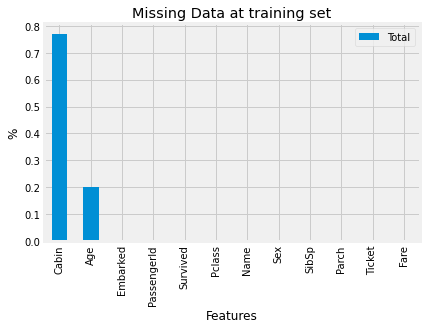

In [138]:
## Explore missing data
miss_data_train = train.isnull().mean().sort_values(ascending=False).reset_index(name='Total')
miss_data_train.plot(kind='bar',
                x='index')
plt.xlabel('Features')
plt.ylabel('%')
plt.title('Missing Data at training set')


Text(0.5, 1.0, 'Missing Data at testing set')

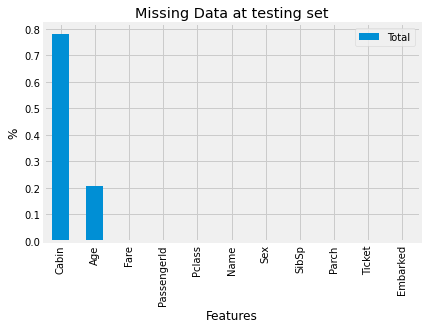

In [139]:
miss_data_test = test.isnull().mean().sort_values(ascending=False).reset_index(name='Total')
miss_data_test.plot(kind='bar',
                x='index')
plt.xlabel('Features')
plt.ylabel('%')
plt.title('Missing Data at testing set')

<AxesSubplot:>

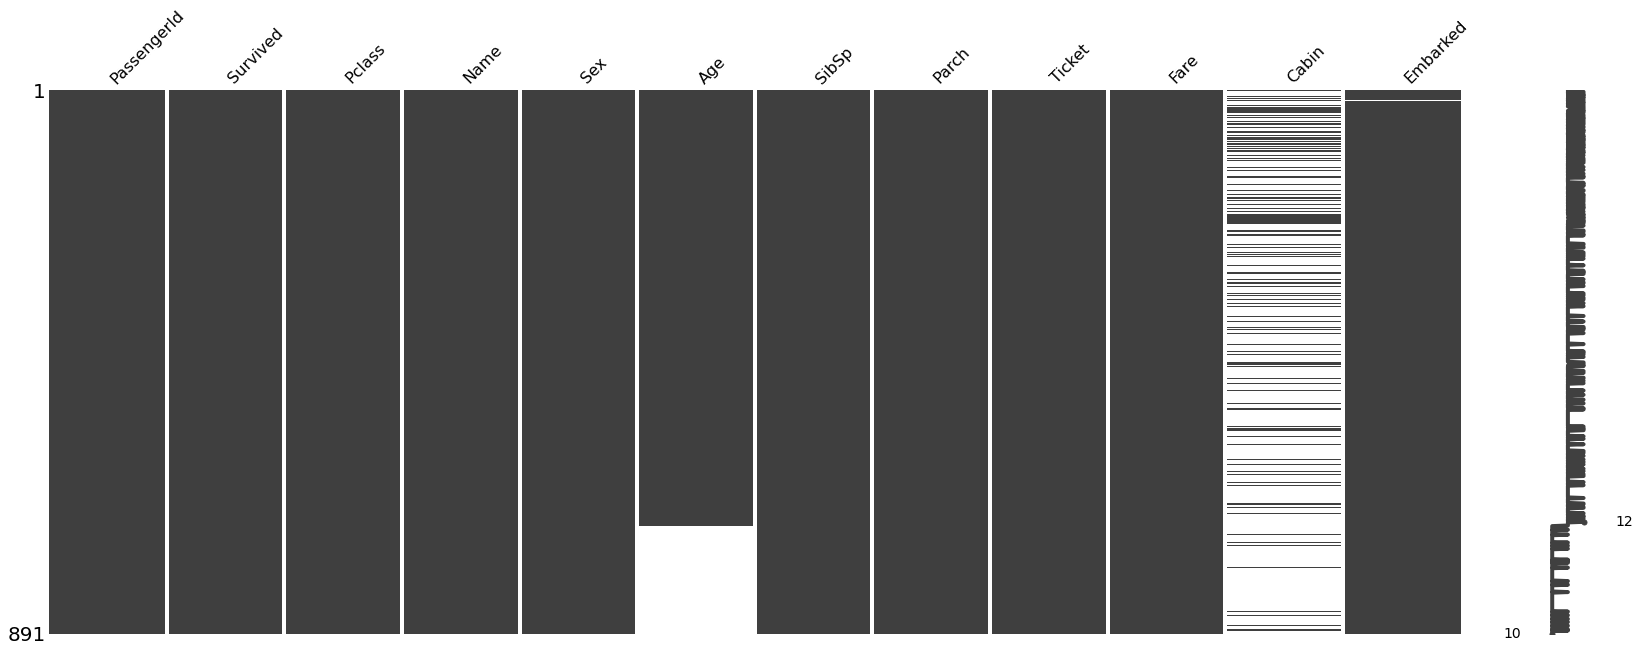

In [140]:
msno.matrix(train.sort_values(by='Age',ascending=False))

<AxesSubplot:>

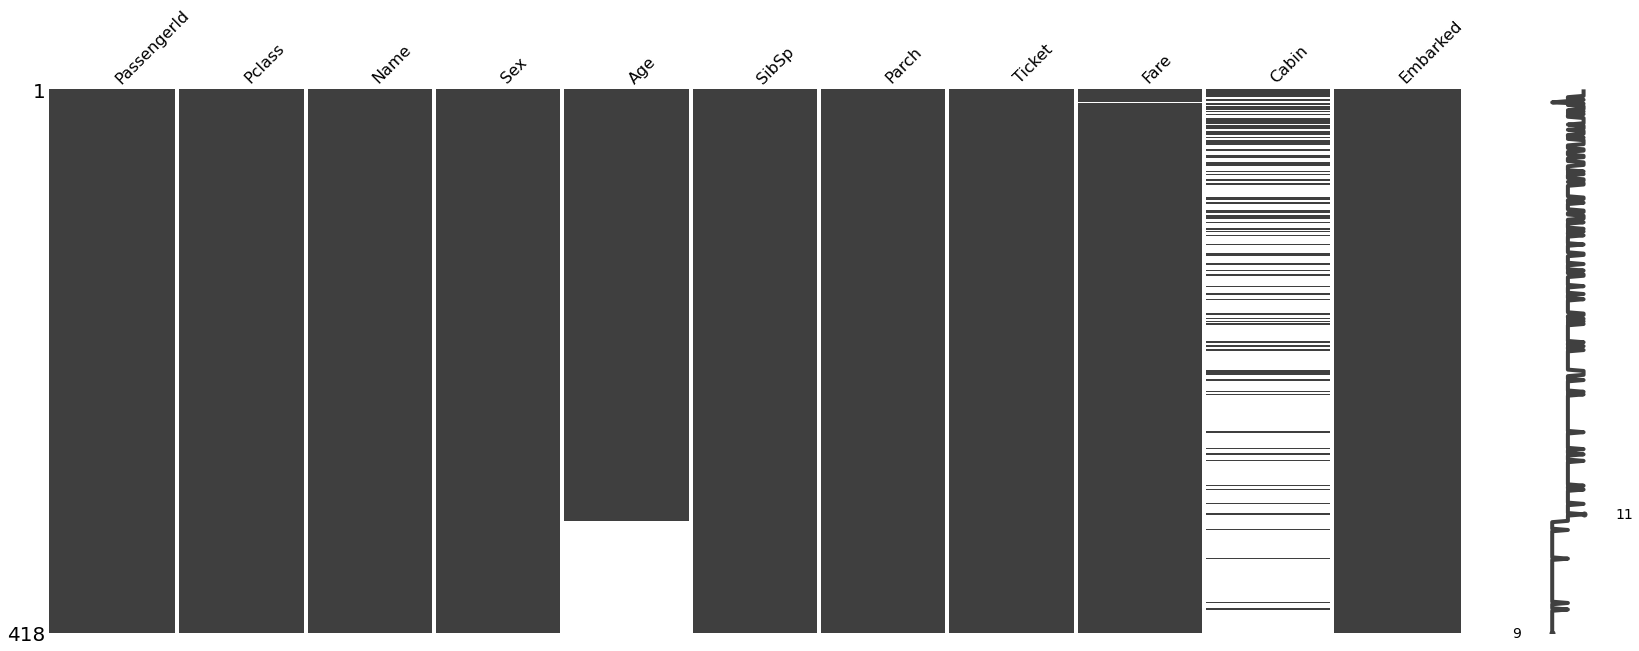

In [141]:
msno.matrix(test.sort_values(by='Age',ascending=False))

### Evaluate effects


In [142]:
train.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

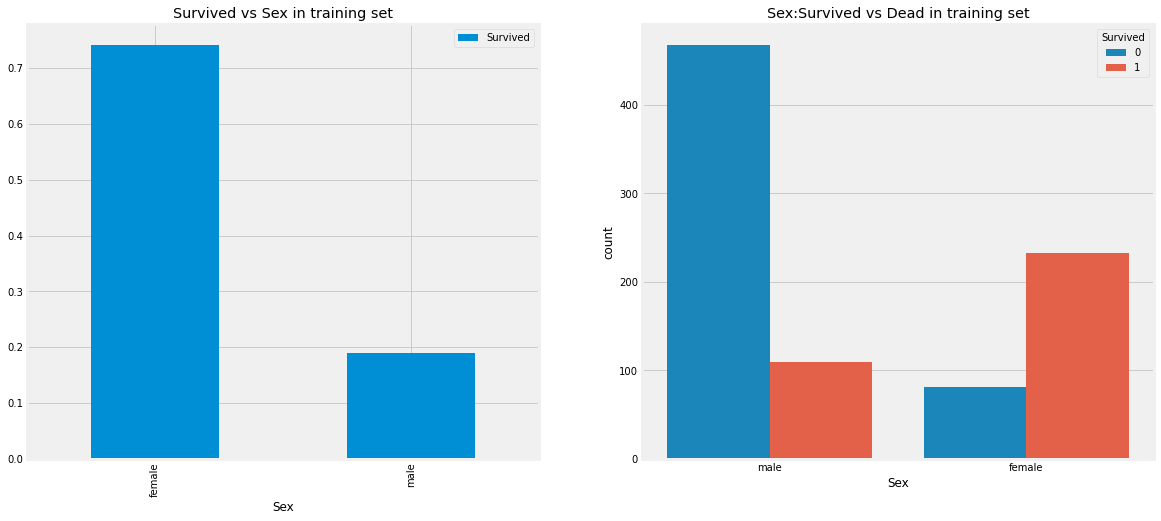

In [143]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex in training set')
sns.countplot('Sex',hue='Survived',data=train,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead in training set')
plt.show()

### Correlations efeccts 

In [144]:
train[['Survived','Pclass','Age']].corr()

,Survived,Pclass,Age
Survived,1.000000,-0.338481,-0.077221
Pclass,-0.338481,1.000000,-0.369226
Age,-0.077221,-0.369226,1.000000


Text(0.5, 1.0, 'Correlation matrix with training set')

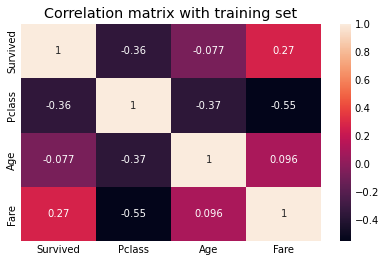

In [145]:
sns.heatmap(train[['Survived','Pclass','Age','Fare']].dropna().corr(), annot=True)
plt.title('Correlation matrix with training set')

Text(0.5, 1.0, 'Correlation matrix with testing set')

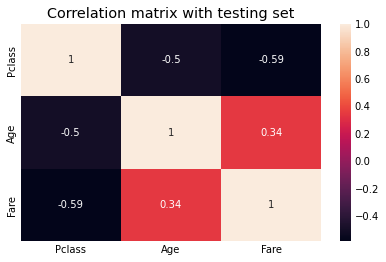

In [146]:
sns.heatmap(test[['Pclass','Age','Fare']].dropna().corr(), annot=True)
plt.title('Correlation matrix with testing set')

Text(0.5, 1.0, 'Gender condition to survived')

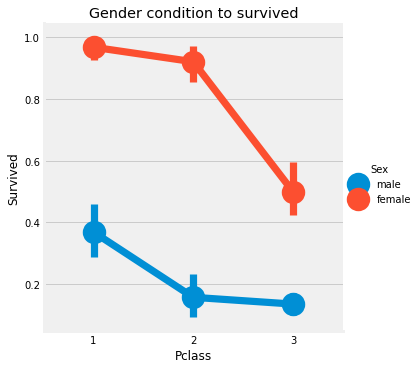

In [147]:
sns.factorplot('Pclass','Survived',hue='Sex',data=train)
plt.title('Gender condition to survived')

In [148]:
train['Embarked'].fillna('S',inplace=True)
test['Embarked'].fillna('S',inplace=True)



In [149]:
train['Sex'].replace(['male','female'],[0,1],inplace=True)
test['Sex'].replace(['male','female'],[0,1],inplace=True)

In [150]:
train['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
test['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)

In [151]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


In [152]:
train.dropna()
test.dropna()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",1,23.0,1,0,21228,82.2667,B45,0
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",1,47.0,1,0,W.E.P. 5734,61.1750,E31,0
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",1,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,1
26,918,1,"Ostby, Miss. Helene Ragnhild",1,22.0,0,1,113509,61.9792,B36,1
28,920,1,"Brady, Mr. John Bertram",0,41.0,0,0,113054,30.5000,A21,0
...,...,...,...,...,...,...,...,...,...,...,...
404,1296,1,"Frauenthal, Mr. Isaac Gerald",0,43.0,1,0,17765,27.7208,D40,1
405,1297,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",0,20.0,0,0,SC/PARIS 2166,13.8625,D38,1
407,1299,1,"Widener, Mr. George Dunton",0,50.0,1,1,113503,211.5000,C80,1
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",1,37.0,1,0,19928,90.0000,C78,2


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

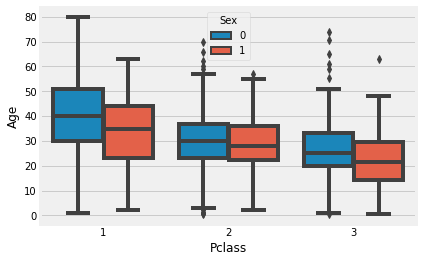

In [153]:
sns.boxplot(x='Pclass',
            y= 'Age',
            data=train,
            hue='Sex')

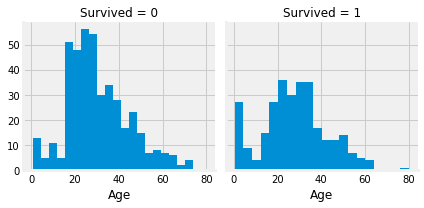

In [154]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [155]:
train = train.dropna()
test = test.dropna()

In [156]:
for i in train:
    train['Title']=train.Name.str.extract('([A-Za-z]+)\.') 

In [157]:
for i in test:
    test['Title']=test.Name.str.extract('([A-Za-z]+)\.') 

In [158]:
combine = [train, test]
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    


In [159]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [160]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,3
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,0,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,PP 9549,16.7000,G6,0,2
11,12,1,1,"Bonnell, Miss. Elizabeth",1,58.0,0,0,113783,26.5500,C103,0,2


## Modelling

In [161]:
train = train.drop(['Name', 'PassengerId'], axis=1)
test = test.drop(['Name'], axis=1)

In [163]:
stats.pearsonr(train['Survived'],train['Sex'])[0] 

0.5357270842247286

In [164]:
stats.kendalltau(train['Survived'],train['Sex'])[0]  

0.5357270842247289

In [165]:
train=train.drop(columns=['Cabin','Ticket'])
test=test.drop(columns=['Cabin','Ticket'])

In [166]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()


In [192]:
### Models 
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred_log = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred_svm = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)


knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred_sgd = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [193]:
models_performance = pd.DataFrame({
  'Models':['Log Reg','SVM','KNN','SGB','Decision Tree','Random Forest'],
  'Score':[acc_log,acc_svc,acc_knn,acc_sgd,acc_decision_tree,acc_random_forest]
})
type = np.where(models_performance['Score']>99,'Overfitting',
                np.where(models_performance['Score']<50,'Underfiting',
                np.where(models_performance['Score']<70 ,'Regular', 
                np.where(models_performance['Score']>80,'Optimal','Optimal'))))
models_performance['Type'] = type


In [194]:
models_performance.sort_values(by='Score',ascending=False)

,Models,Score,Type
4,Decision Tree,100.00,Overfitting
5,Random Forest,100.00,Overfitting
0,Log Reg,78.92,Optimal
2,KNN,74.59,Optimal
3,SGB,70.81,Optimal
1,SVM,67.57,Regular


## Tune Knn Model

In [206]:
from sklearn.model_selection import GridSearchCV

n_neighbors = list(range(1,301,2))




In [208]:
hyperparameters = dict(n_neighbors=n_neighbors,
                       p = (1,2),
                       weights= ('uniform', 'distance'),
                      metric = ('minkowski', 'chebyshev'))
knn_tune = KNeighborsClassifier(algorithm='auto')
clf = GridSearchCV(knn_tune, hyperparameters, cv=10)
best_model = clf.fit(X_train, Y_train)
best_model.best_estimator_


KNeighborsClassifier(n_neighbors=79, p=1, weights='distance')

In [210]:
knn_final = KNeighborsClassifier(n_neighbors=79, p=1, weights='distance')
best_model = knn_final.fit(X_train, Y_train)
acc_KNN = round(best_model.score(X_train, Y_train) * 100, 3)
print(acc_KNN)

100.0


## Feature Importance Log reg    

In [230]:
from sklearn.feature_selection import SelectFromModel
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
scores = cross_val_score(logreg, X_train, Y_train.ravel(), cv=10, scoring = 'f1')
Y_pred_log = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

78.92

Text(0.5, 1.0, 'Feature importance using Log Reg Model')

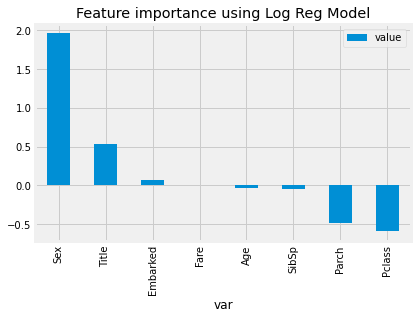

In [254]:
imp = pd.DataFrame(logreg.coef_.T, columns=['value'])
imp['var'] = X_train.columns
imp  = imp.sort_values(by='value', ascending=False)
imp.plot(kind = "bar",
         x='var')
plt.title("Feature importance using Log Reg Model")